# Aim of the notebook

In this notebook we define the domains using STAGATE

## Import packages

In [1]:
import pandas as pd
import numpy as np
import scanpy as sc
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import gc
import warnings
warnings.filterwarnings("ignore")
import STAGATE

# Load paths and read data

In [2]:
saving_path=r'../../data/processed_adata/'
adata=sc.read('../../data/processed_adata/adata_multisection_nuclei_r1_with_annotations.h5ad')
adata=adata[adata.obs['replicate']=='1']
adata.X=adata.layers['raw']
adata.obsm['spatial']=np.array(adata.obs.loc[:,['x_centroid','y_centroid']])

## ROI 2

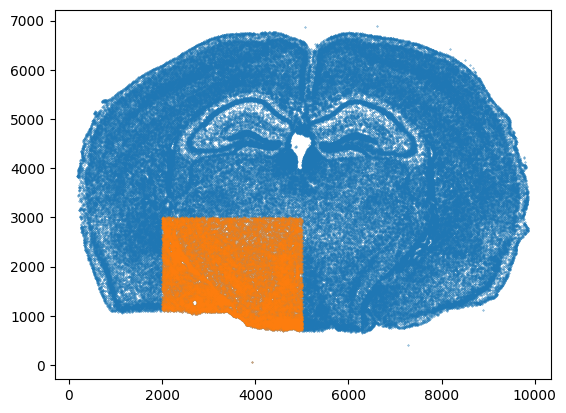

In [3]:
adata2=adata[(adata.obs['x_centroid']<5000)&(adata.obs['x_centroid']>2000)&(adata.obs['y_centroid']<3000)]
plt.scatter(adata.obs.loc[:,'x_centroid'],adata.obs.loc[:,'y_centroid'],s=0.1)
plt.scatter(adata2.obs.loc[:,'x_centroid'],adata2.obs.loc[:,'y_centroid'],s=0.1)
adata=adata2
ndoms=[]
for num in range(1,5):
    ndoms.append(len(np.unique(adata.obs['region_level'+str(num)])))

------Calculating spatial graph...
The graph contains 8974 edges, 18715 cells.
0.4795 neighbors per cell on average.
Size of Input:  (18715, 154)
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


2024-06-05 08:58:45.279494: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 AVX512F FMA
2024-06-05 08:58:45.306841: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2500000000 Hz
2024-06-05 08:58:45.309667: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x723c140 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2024-06-05 08:58:45.309715: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2024-06-05 08:58:45.315710: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2024-06-05 08:58:45.386959: E tensorflow/stream_executor/cuda/cuda_driver.cc:318] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2024-06-05 08:58:45.386978: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:1

5


R[write to console]:                    __           __ 
   ____ ___  _____/ /_  _______/ /_
  / __ `__ \/ ___/ / / / / ___/ __/
 / / / / / / /__/ / /_/ (__  ) /_  
/_/ /_/ /_/\___/_/\__,_/____/\__/   version 6.0.0
Type 'citation("mclust")' for citing this R package in publications.



fitting ...
  |======================================================================| 100%


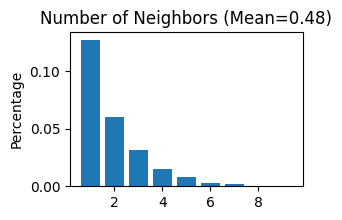

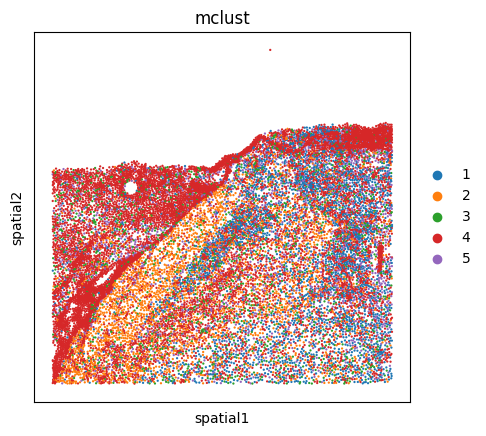

6
fitting ...
  |======================================================================| 100%


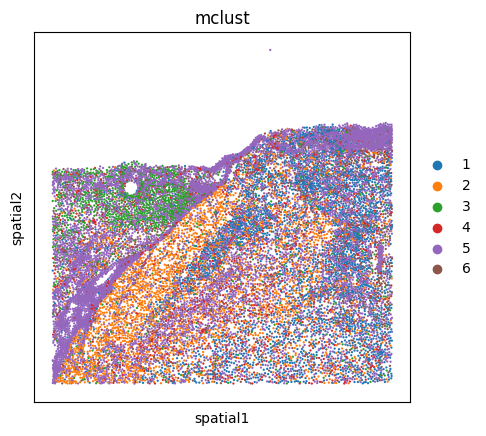

10
fitting ...
  |======================================================================| 100%


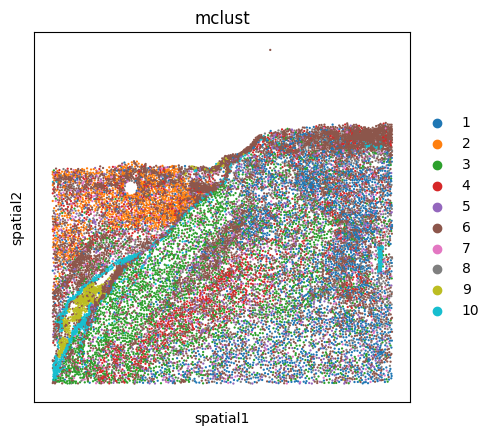

16
fitting ...
  |======================================================================| 100%


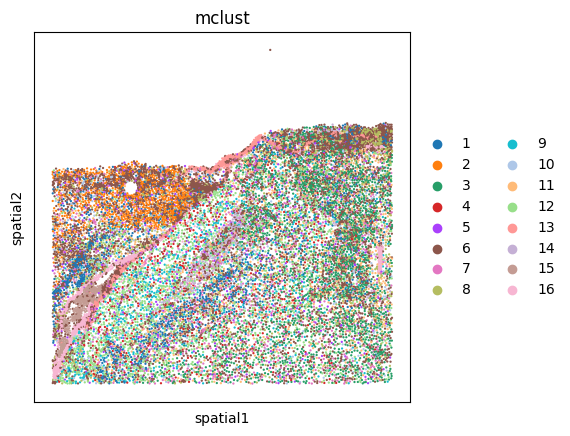

------Calculating spatial graph...
The graph contains 81374 edges, 18715 cells.
4.3481 neighbors per cell on average.
Size of Input:  (18715, 154)


100%|█████████████████████████████████████████████████████████████████████████████████| 500/500 [03:32<00:00,  2.35it/s]


5
fitting ...
  |======================================================================| 100%


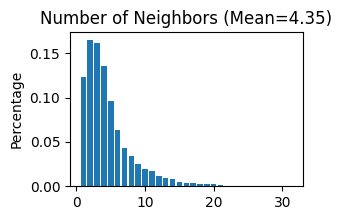

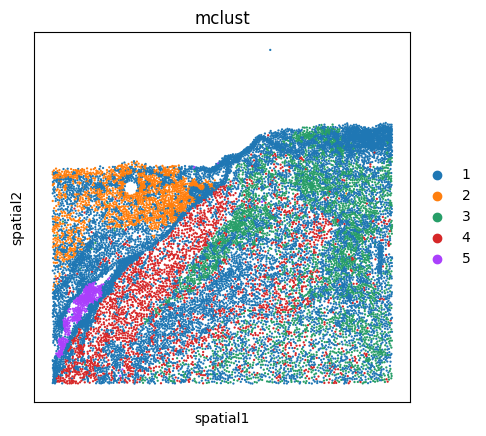

6
fitting ...
  |======================================================================| 100%


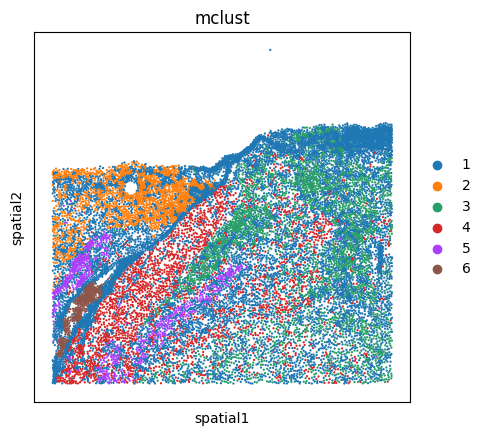

10
fitting ...
  |======================================================================| 100%


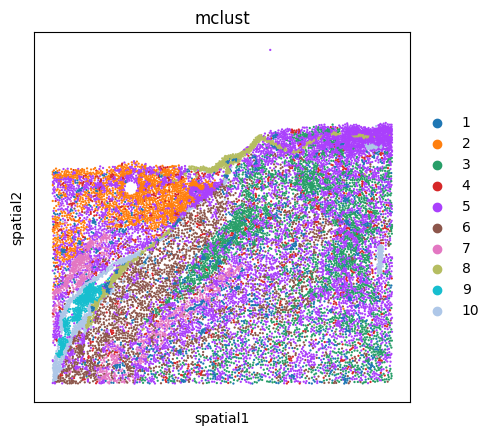

16
fitting ...
  |======================================================================| 100%


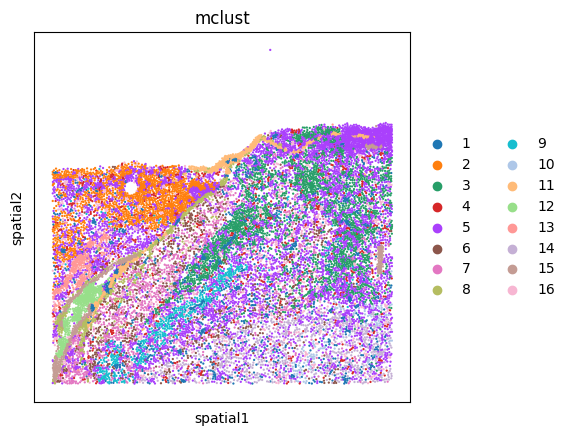

------Calculating spatial graph...
The graph contains 196298 edges, 18715 cells.
10.4888 neighbors per cell on average.
Size of Input:  (18715, 154)


100%|█████████████████████████████████████████████████████████████████████████████████| 500/500 [05:01<00:00,  1.66it/s]


5
fitting ...
  |======================================================================| 100%


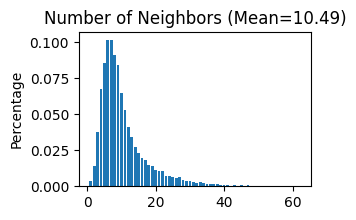

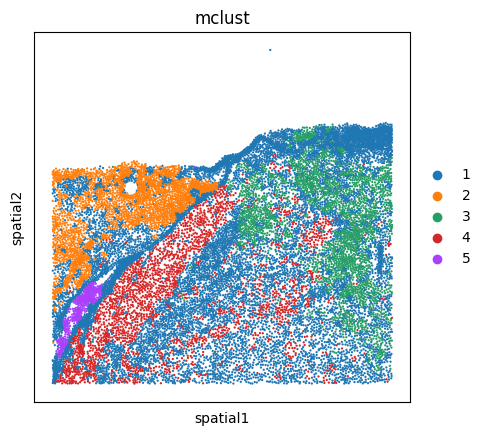

6
fitting ...
  |======================================================================| 100%


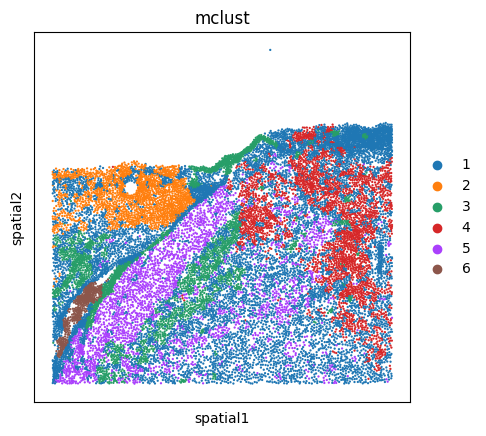

10
fitting ...
  |======================================================================| 100%


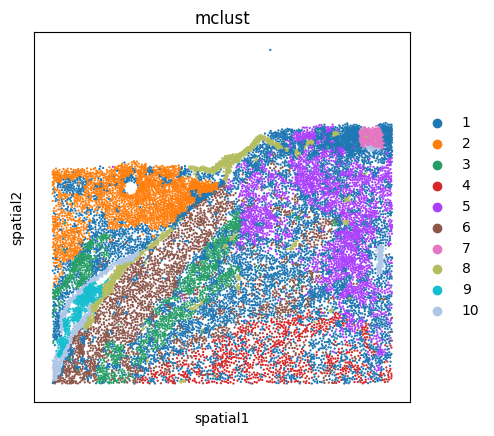

16
fitting ...
  |======================================================================| 100%


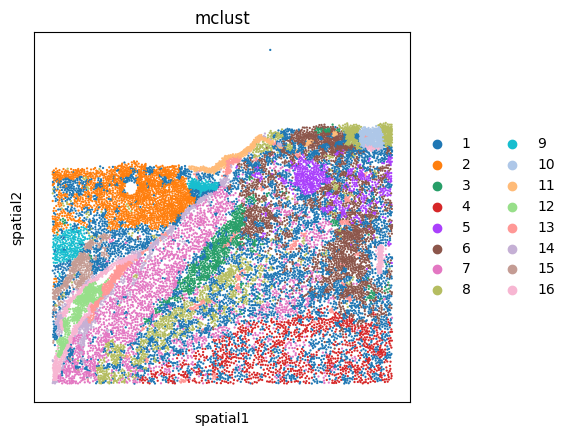

------Calculating spatial graph...
The graph contains 346592 edges, 18715 cells.
18.5195 neighbors per cell on average.
Size of Input:  (18715, 154)


100%|█████████████████████████████████████████████████████████████████████████████████| 500/500 [07:21<00:00,  1.13it/s]


5
fitting ...
  |======================================================================| 100%


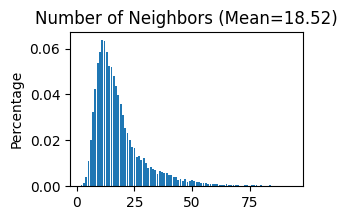

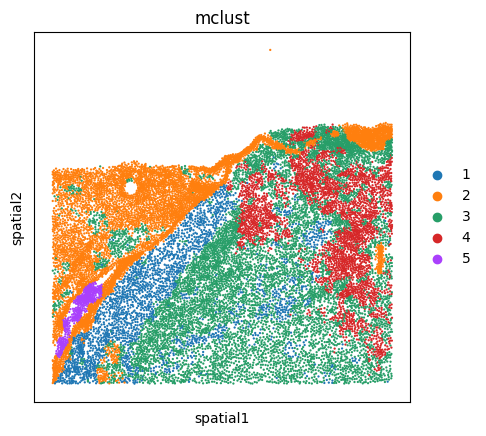

6
fitting ...
  |======================================================================| 100%


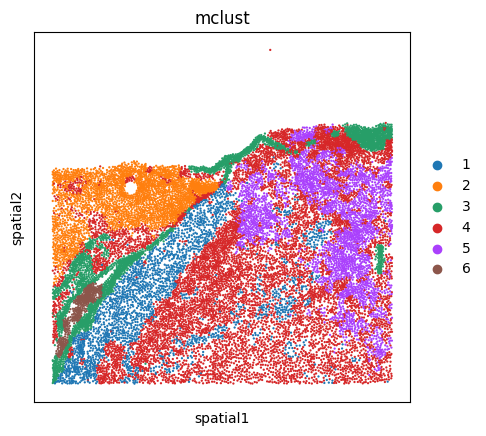

10
fitting ...
  |======================================================================| 100%


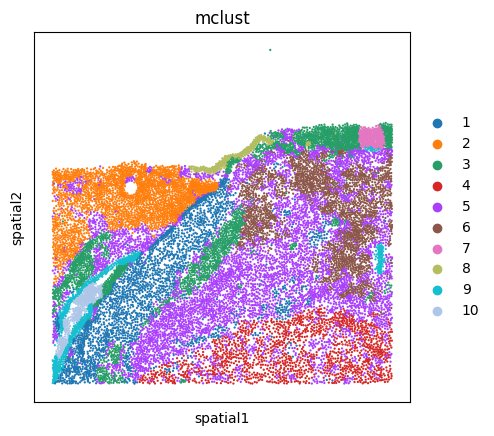

16
fitting ...
  |======================================================================| 100%


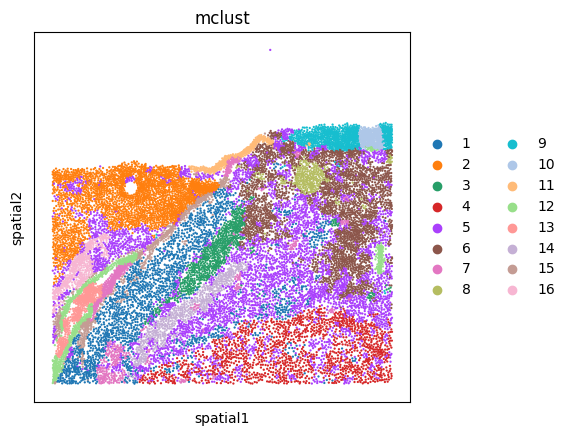

------Calculating spatial graph...
The graph contains 536072 edges, 18715 cells.
28.6440 neighbors per cell on average.
Size of Input:  (18715, 154)


100%|█████████████████████████████████████████████████████████████████████████████████| 500/500 [09:59<00:00,  1.20s/it]


5
fitting ...
  |======================================================================| 100%


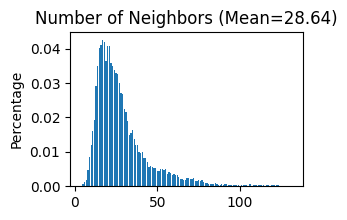

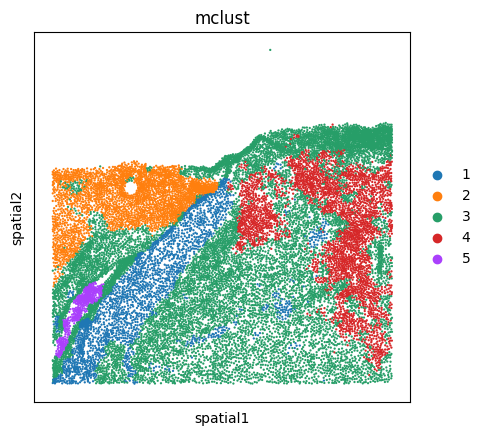

6
fitting ...
  |======================================================================| 100%


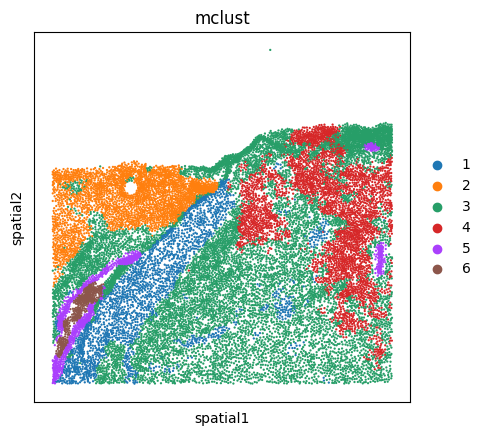

10
fitting ...
  |======================================================================| 100%


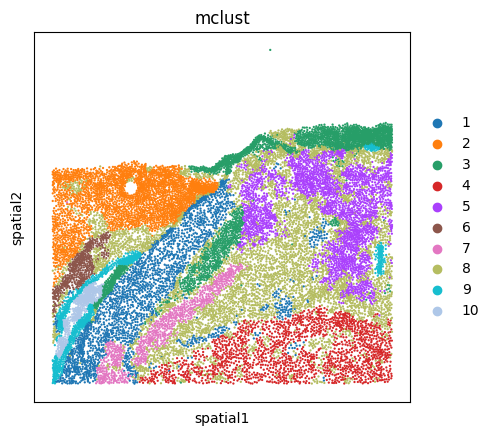

16
fitting ...
  |======================================================================| 100%


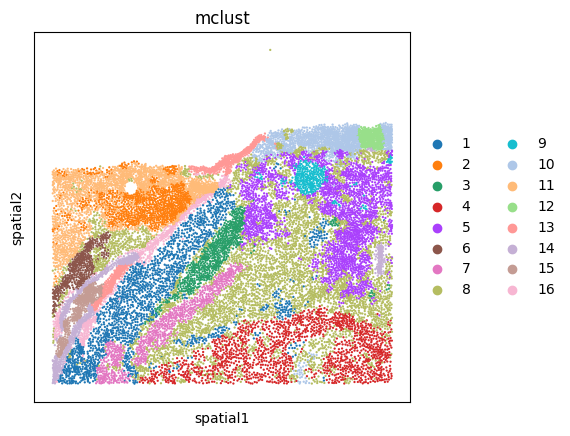

In [4]:
adata_orig=adata.copy()
for rc in [10,20,30,40,50]:
    STAGATE.Cal_Spatial_Net(adata_orig, rad_cutoff=rc)
    STAGATE.Stats_Spatial_Net(adata_orig)
    adata = STAGATE.train_STAGATE(adata_orig, alpha=0)
    sc.pp.neighbors(adata, use_rep='STAGATE')
    sc.tl.umap(adata)
   # nclusts=[6,11,24,83,155]
    for n in ndoms:
        try:
            if not os.path.exists('../../figures/7.spatial_architecture/domains_predicted/ROI2/'+str(n)+'/predicted_STAGATE_rad_cutoff'+str(rc)+'.csv'):
                print(n)
                adata = STAGATE.mclust_R(adata, used_obsm='STAGATE', num_cluster=n)
                adata.obs['clusters_'+str(n)]=adata.obs['mclust']
                sc.pl.spatial(adata,color='mclust',spot_size=20)
                plt.show()
                adata.obs.to_csv('../../figures/7.spatial_architecture/domains_predicted/ROI2/'+str(n)+'/predicted_STAGATE_rad_cutoff'+str(rc)+'.csv')
        except:
            print('Error arose')